In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
zomato = pd.read_csv("zomato.csv")
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [69]:
zomato.shape

(51717, 17)

In [70]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# zomato.info()

In [71]:
zomato = zomato.drop(["url","address","phone","menu_item","dish_liked","reviews_list"],axis=1)
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [72]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [73]:
# Dropping Duplicates
zomato.drop_duplicates(inplace=True)

In [74]:
zomato.shape

(51609, 11)

## Cleaning Rate Column

In [75]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Removing "NEW", "-" and "/5" from Rate

In [76]:
def handlerate(value):
    if value == "NEW" or value == "-":
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)

zomato['rate'] = zomato['rate'].apply(handlerate)
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [77]:
zomato.rate.isna().sum()

10019

## Filling Null Values in Rate column

In [78]:
zomato['rate'].fillna(zomato['rate'].mean(),inplace=True)
zomato.rate.isna().sum()

0

## Dropping other null values

In [79]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [80]:
zomato.dropna(inplace=True)
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [81]:
zomato.rename(columns={'approx_cost(for two people)':'Cost2Plate','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plate,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [82]:
zomato['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [83]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2Plate', 'type', 'city'],
      dtype='object')

In [84]:
zomato = zomato.drop(['city'],axis=1)

## Removing "," from Cost2Plate Column

In [85]:
zomato['Cost2Plate'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [86]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
zomato['Cost2Plate'] = zomato['Cost2Plate'].apply(handlecomma)
zomato['Cost2Plate'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

## Cleaning 'Rest' Column

In [87]:
zomato['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [88]:
rest_types = zomato['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

## Making Rest types less than 1000  in frequency as others

In [89]:
rest_types_lessthan1000 = rest_types[rest_types<1000]

In [90]:
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [91]:
def handle_rest_type(value):
    if value in rest_types_lessthan1000:
        return 'others'
    else:
        return value
    
zomato['rest_type'] = zomato['rest_type'].apply(handle_rest_type)
zomato['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

## Cleaning Location Column

In [92]:
zomato['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [93]:
location = zomato['location'].value_counts(ascending=False)
location_lessthan300 = location[location<300]

In [94]:
def handle_location(value):
    if value in location_lessthan300:
        return 'others'
    else:
        return value
    
zomato['location'] = zomato['location'].apply(handle_location)
zomato['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [95]:
zomato.location.unique()

array(['Banashankari', 'Basavanagudi', 'others', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'HSR',
       'Marathahalli', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'St. Marks Road',
       'Cunningham Road', 'Commercial Street', 'Domlur', 'Ejipura',
       'Malleshwaram', 'Kammanahalli', 'Koramangala 6th Block',
       'Brookefield', 'Rajajinagar', 'Banaswadi', 'Kalyan Nagar',
       'New BEL Road'], dtype=object)

In [96]:
zomato['location'] = zomato['location'].apply(lambda x : x.strip())

## Cleaning 'Cuisines' column

In [97]:
zomato['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [98]:
cuisines = zomato['cuisines'].value_counts(ascending=False)
cuisines_lessthan100 = cuisines[cuisines<100]

In [99]:
def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return 'others'
    else:
        return value
    
zomato['cuisines'] = zomato['cuisines'].apply(handle_cuisines)
zomato['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

# Visualization

### Countplot for various locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

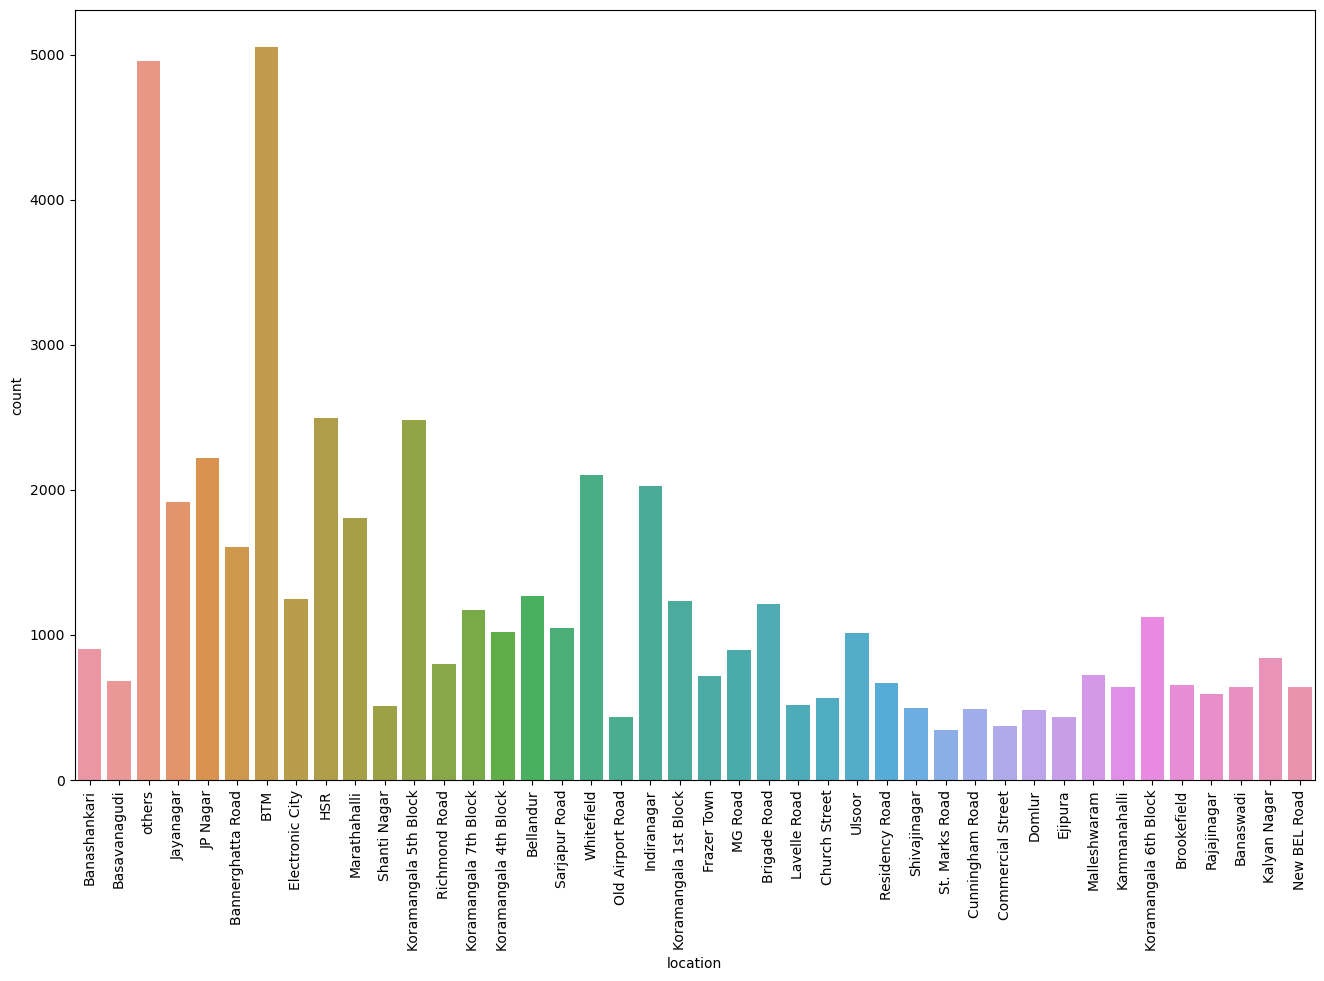

In [100]:
plt.figure(figsize=(16,10))
sns.countplot(zomato,x='location')
plt.xticks(rotation=90)

<Axes: xlabel='online_order', ylabel='count'>

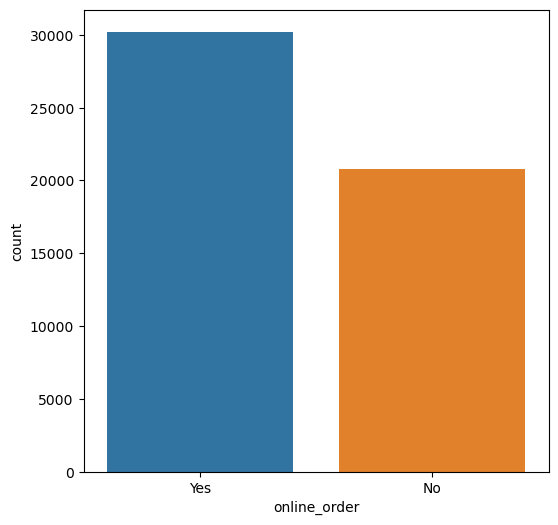

In [101]:
plt.figure(figsize=(6,6))
sns.countplot(zomato,x='online_order')

<Axes: xlabel='book_table', ylabel='count'>

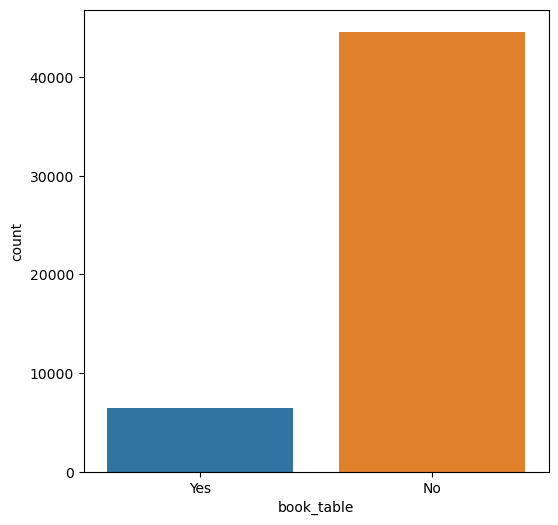

In [102]:
plt.figure(figsize=(6,6))
sns.countplot(zomato,x='book_table')

## Visualising Online Order  vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

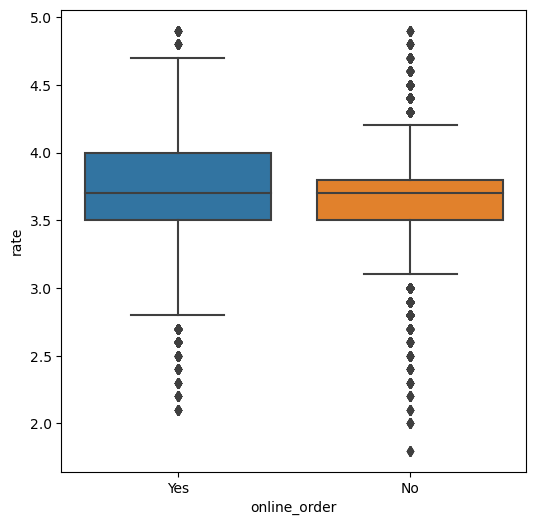

In [103]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=zomato)

## Visualising Book Table  vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

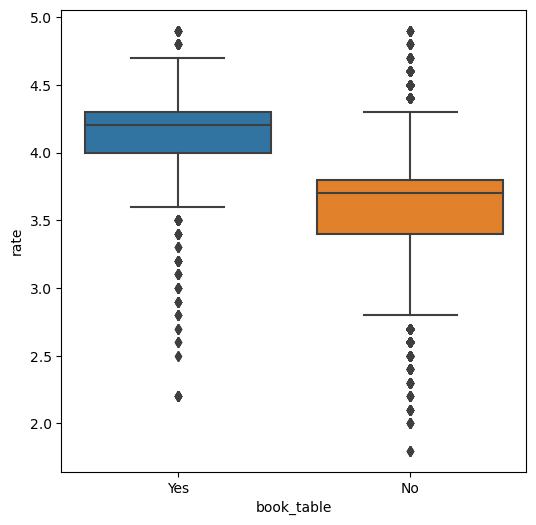

In [104]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=zomato)

## Visualizing online order facility location wise

In [107]:
df1 = zomato.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None,index=['location'],columns=['online_order'],fill_value=0, aggfunc=np.mean)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

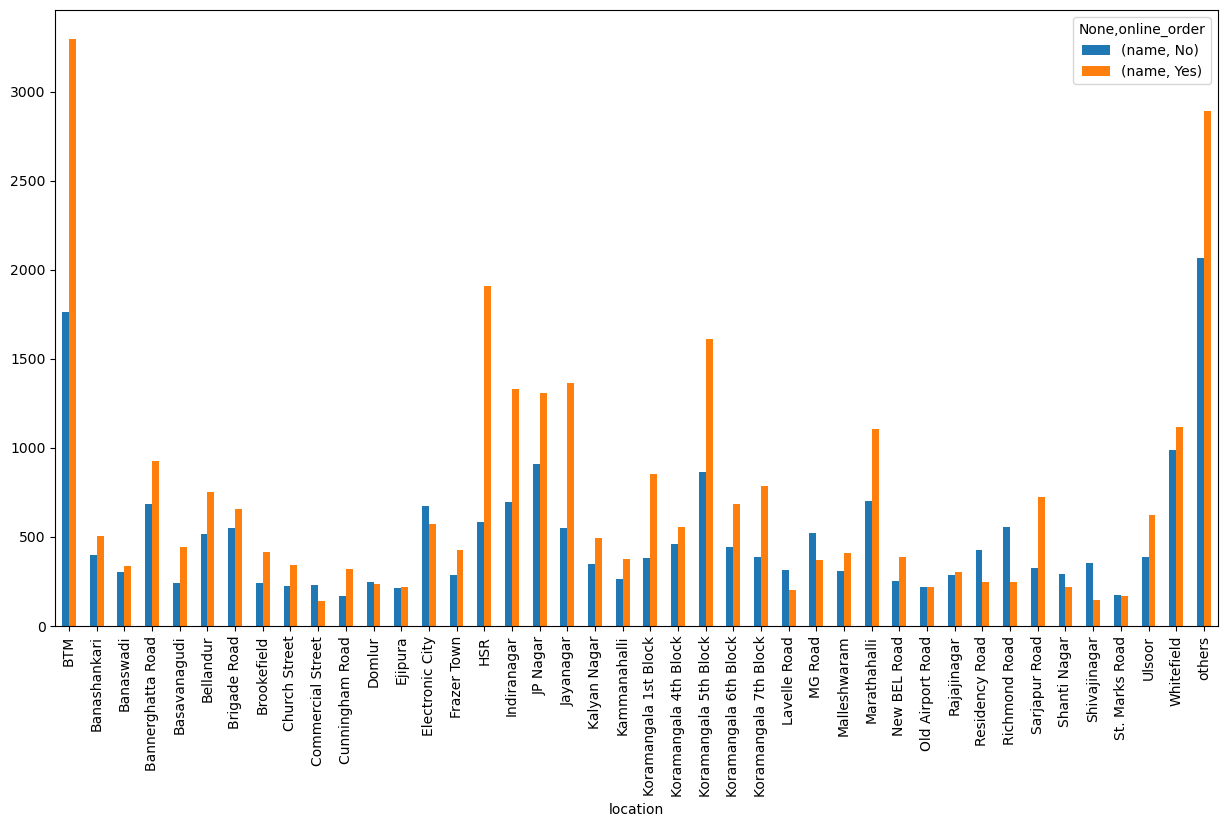

In [109]:
df1.plot(kind='bar',figsize=(15,8))

## Visualizing Book Table Facility Location Wise

In [111]:
df2 = zomato.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None,index=['location'],columns=['book_table'],fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

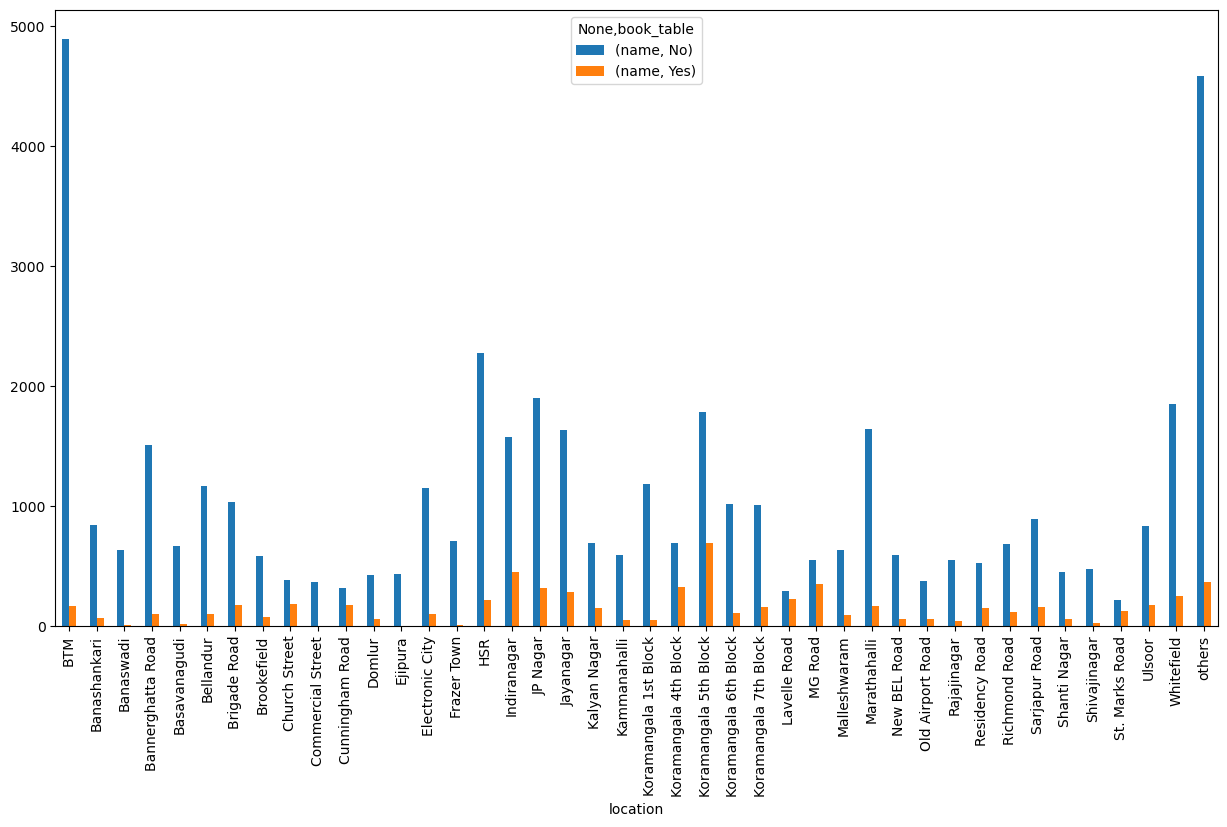

In [112]:
df2.plot(kind='bar',figsize=(15,8))

## Visualizing Type of Restaurants and their ratings

<Axes: xlabel='type', ylabel='rate'>

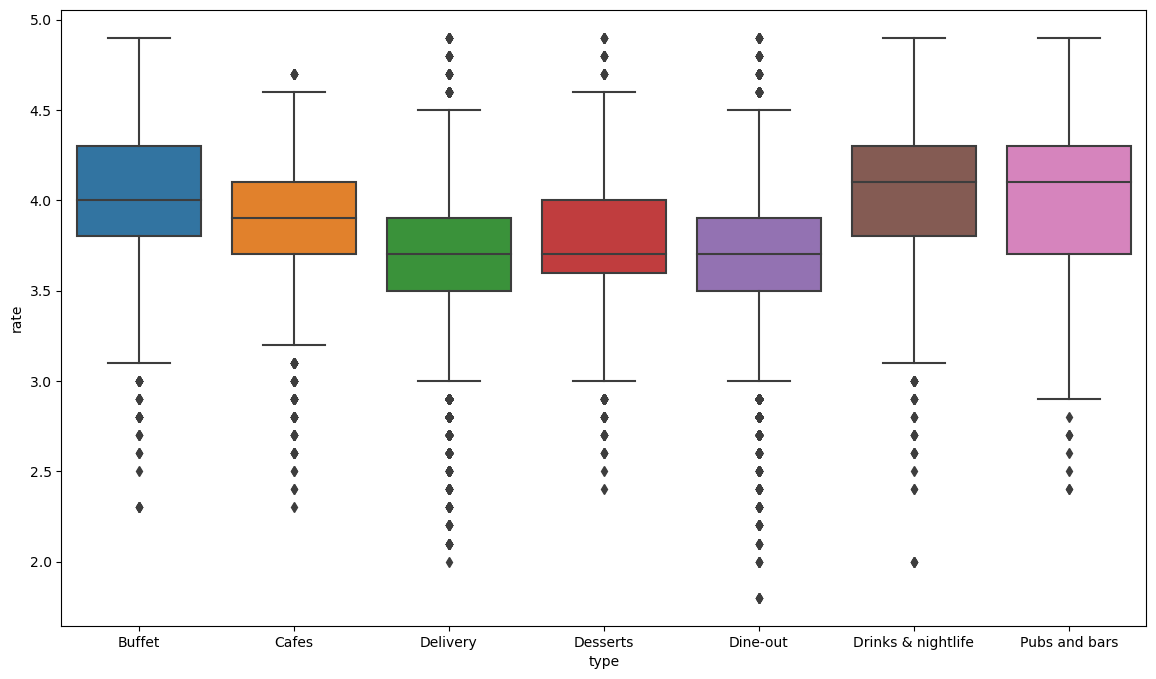

In [116]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=zomato)

In [117]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [121]:
zomato['online_order'].count()

51042

In [143]:
zomato[zomato['online_order']=='Yes'].count()
zomato.rate.mean()

3.7014242704990252

In [136]:
zomato[zomato['book_table']=='No'].count()

name            44626
online_order    44626
book_table      44626
rate            44626
votes           44626
location        44626
rest_type       44626
cuisines        44626
Cost2Plate      44626
type            44626
dtype: int64

(51042, 10)

In [137]:
(6416 / 51042) * 100

12.570040358920103

In [48]:
# Find the percentage of value missing on each column of zomato data

def get_null_data(data):
    
    total_rows = data.shape[0]
    for columns in data.columns:
        null_values = data[columns].isnull().sum()
        if null_values > 0:
            per_null_value = float(null_values)*100/total_rows
            print(f'{columns} column has {per_null_value} null values')

In [49]:
get_null_data(zomato)

rate column has 15.017230030588145 null values
phone column has 2.3308940256320905 null values
location column has 0.03678321136794827 null values
rest_type column has 0.4355906609362295 null values
dish_liked column has 54.25717272621675 null values
cuisines column has 0.08324621520114608 null values
approx_cost(for two people) column has 0.6620978046230689 null values


In [50]:
rows_after_dropping_null = zomato.dropna(axis=0).shape[0]
rows_before_dropping_null = zomato.shape[0]

per_info_loss = (rows_before_dropping_null - rows_after_dropping_null)*100/rows_before_dropping_null
print(f'Percentage information loss after dropping null values is {round(per_info_loss,2)}%')

Percentage information loss after dropping null values is 55.12%


In [22]:
# Step 1 - Delete the dish_liked column and drop null values

In [77]:
zomato.drop(columns=["dish_liked"],axis=1,inplace=True)

In [26]:
zomato.dropna(axis=0,inplace=True)

In [28]:
get_null_data(zomato)  # Empty

In [52]:
zomato[['rate']]

,rate
0,4.1/5
1,4.1/5
2,3.8/5
3,3.7/5
4,3.8/5
...,...
51712,3.6 /5
51713,NaN
51714,NaN
51715,4.3 /5


In [66]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [40]:
# Convert the column "rate" from string to integer data type 

# replace --> Nan -> 0 and NEW -> 0

In [67]:
zomato['rate'] = zomato[["rate"]].replace(["NEW",np.nan,'-'],'0')

In [68]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [69]:
zomato['rate'] = zomato['rate'].apply(lambda x : x.replace('/5',''))

In [70]:
zomato.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '0', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [71]:
zomato['rate'] = zomato['rate'].apply(lambda x : float(x.strip()))

In [72]:
zomato['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    0.0
51714    0.0
51715    4.3
51716    3.4
Name: rate, Length: 51654, dtype: float64

In [74]:
zomato.replace({
    'rate': 0.0
},
{
    'rate': zomato.rate.mean()
},inplace=True)

In [73]:
zomato.rate.mean()

2.9823188910829748

In [75]:
zomato['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    2.982319
51714    2.982319
51715    4.300000
51716    3.400000
Name: rate, Length: 51654, dtype: float64

In [78]:
get_null_data(zomato)

phone column has 2.3308940256320905 null values
location column has 0.03678321136794827 null values
rest_type column has 0.4355906609362295 null values
cuisines column has 0.08324621520114608 null values
approx_cost(for two people) column has 0.6620978046230689 null values


In [79]:
rows_after_dropping_null = zomato.dropna(axis=0).shape[0]
rows_before_dropping_null = zomato.shape[0]

per_info_loss = (rows_before_dropping_null - rows_after_dropping_null)*100/rows_before_dropping_null
print(f'Percentage information loss after dropping null values is {round(per_info_loss,2)}%')

Percentage information loss after dropping null values is 2.78%


In [80]:
zomato.dropna(inplace=True)

In [81]:
get_null_data(zomato)

In [82]:
zomato.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'phone', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [83]:
zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [85]:
zomato.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'phone', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [86]:
# convert cost datatype to integer

In [87]:
zomato['cost'] = zomato['cost'].str.replace(',','')

In [92]:
zomato['cost'] = zomato['cost'].astype(int)

In [93]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50220 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  50220 non-null  object 
 1   book_table    50220 non-null  object 
 2   rate          50220 non-null  float64
 3   votes         50220 non-null  int64  
 4   phone         50220 non-null  object 
 5   location      50220 non-null  object 
 6   rest_type     50220 non-null  object 
 7   cuisines      50220 non-null  object 
 8   cost          50220 non-null  int32  
 9   reviews_list  50220 non-null  object 
 10  menu_item     50220 non-null  object 
 11  type          50220 non-null  object 
 12  city          50220 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 5.2+ MB


In [100]:
zomato['online_order'] = zomato['online_order'].replace({'Yes':True,'No':False})
zomato['book_table'] = zomato['book_table'].replace({'Yes':True,'No':False})

In [107]:
for i in eval(zomato.reviews_list[0]):
    print(i[1].split('\n')[1])

  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.
  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.
  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took ages to come. F

In [112]:
zomato['review'] = zomato['reviews_list'].apply(lambda x : eval(x))
zomato['review'] = zomato['reviews_list'].apply(lambda x : i[1].split('\n')[1])

In [120]:
zomato

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,review
0,True,True,4.100000,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,The place is nice and comfortable. Food wise...
1,True,False,4.100000,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,The place is nice and comfortable. Food wise...
2,True,False,3.800000,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,The place is nice and comfortable. Food wise...
3,False,False,3.700000,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,The place is nice and comfortable. Food wise...
4,False,False,3.800000,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,The place is nice and comfortable. Food wise...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,False,False,2.500000,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,The place is nice and comfortable. Food wise...
51712,False,False,3.600000,27,080 40301477,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,The place is nice and comfortable. Food wise...
51713,False,False,2.982319,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield,The place is nice and comfortable. Food wise...
51715,False,True,4.300000,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,The place is nice and comfortable. Food wise...


In [121]:
zomato.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old 

In [122]:
zomato.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['paris','paris','tokyo','amsterdam'])
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [124]:
le.transform(['tokyo','tokyo','paris'])

array([2, 2, 1])

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
types = le.fit_transform(zomato['type'])

In [126]:
types

array([0, 0, 0, ..., 6, 6, 6])

In [127]:
zomato['type'] = types

In [130]:
zomato

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,review
0,True,True,4.100000,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
1,True,False,4.100000,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,Banashankari,The place is nice and comfortable. Food wise...
2,True,False,3.800000,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
3,False,False,3.700000,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0,Banashankari,The place is nice and comfortable. Food wise...
4,False,False,3.800000,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,False,False,2.500000,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],6,Whitefield,The place is nice and comfortable. Food wise...
51712,False,False,3.600000,27,080 40301477,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],6,Whitefield,The place is nice and comfortable. Food wise...
51713,False,False,2.982319,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],6,Whitefield,The place is nice and comfortable. Food wise...
51715,False,True,4.300000,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],6,Whitefield,The place is nice and comfortable. Food wise...


In [131]:
zomato.iloc[51715:]

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,review


In [132]:
zomato.reset_index(drop=True, inplace=True)

In [133]:
zomato

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,review
0,True,True,4.100000,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
1,True,False,4.100000,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0,Banashankari,The place is nice and comfortable. Food wise...
2,True,False,3.800000,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
3,False,False,3.700000,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0,Banashankari,The place is nice and comfortable. Food wise...
4,False,False,3.800000,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0,Banashankari,The place is nice and comfortable. Food wise...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50215,False,False,2.500000,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],6,Whitefield,The place is nice and comfortable. Food wise...
50216,False,False,3.600000,27,080 40301477,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],6,Whitefield,The place is nice and comfortable. Food wise...
50217,False,False,2.982319,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],6,Whitefield,The place is nice and comfortable. Food wise...
50218,False,True,4.300000,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],6,Whitefield,The place is nice and comfortable. Food wise...


In [138]:
zomato.iloc[50217:50218]['type'][50217]

6

In [140]:
row_number = 500

le.classes_[zomato.iloc[row_number:row_number + 1]['type'][row_number]]

'Desserts'